In [1]:
%pylab inline
#%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42
from IPython.display import SVG, display
import figurefirst as ff

Populating the interactive namespace from numpy and matplotlib


In [12]:
import h5py
#start_db = h5py.File('../02_imaging_post_processing/start_db.hdf5','r')
#stop_db = h5py.File('../02_imaging_post_processing/stop_db.hdf5','r')
trial_db = h5py.File('../02_imaging_post_processing/trial_db.hdf5')

In [13]:
set(trial_db['genotypes'])

{'+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR10A12-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR29E05-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR31E10-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR74F03-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR75B06-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR10A12-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR29E05-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR31E10-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR74F03-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR75B06-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40;P{y[+t7.7] w

In [14]:
def resample_dset(trial_db,skey = None,grouping_key = None,sub_selection = None):
    sub_dataset = np.array(trial_db[skey])[sub_selection]
    sub_group = np.array(trial_db[grouping_key])[sub_selection]
    ntrials= len(sub_dataset)
    ngroups = len(set(sub_group))
    resampled_moms = list()
    for rep in range(100):
        shidx = np.random.choice(ntrials, ntrials)
        resampled_trials = sub_dataset[shidx]
        resampled_group = sub_group[shidx]
        resampled_means = group_means(resampled_trials,resampled_group)
        shidx2 = np.random.choice(len(resampled_means),ngroups)
        resampled_moms.append(np.nanmean(resampled_means[shidx2],axis = 0))
    return np.array(resampled_moms)

In [15]:
def group_means(data,groups):
    temp_list = list()
    group_items = list(set(groups))
    for group_item in group_items:
        selection = groups == group_item
        temp_list.append(np.nanmean(data[selection],axis = 0))
    return np.array(temp_list)

In [16]:
trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'

In [22]:
import group_data as gd

In [23]:
##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
xi = gd.get_xio('flight_starts')

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
start_data_22H05 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_22H05[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                               'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####    
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = xi < 0
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)

start_data_39E01 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_39E01[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
start_data_22H05_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_22H05_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
start_data_39E01_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_39E01_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
stop_data_22H05 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    stop_data_22H05[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                               'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####    
trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
stop_data_39E01 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    stop_data_39E01[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
stop_data_22H05_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    stop_data_22H05_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####
trial_selection = np.array(trial_db['trial_names']) == 'flight_stops'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'

prestim_ep = (xi < 0) & (xi > -0.5)
#prestim_flight = np.nansum(np.array(trial_db['wb_frequency'])[:,prestim_ep]>100,axis = 1)<10
sub_selection = trial_selection & genotype_selection #& prestim_flight
print sum(sub_selection)
stop_data_39E01_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    stop_data_39E01_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.nanmean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

585


/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


44
60
7
530
28
53
3


In [39]:
data_dict = {'init_22H05':start_data_22H05,
             'init_22H05_c':start_data_22H05_c,
             'init_39E01':start_data_39E01,
             'init_39E01_c':start_data_39E01_c,
             'term_22H05':stop_data_22H05,
             'term_22H05_c':stop_data_22H05_c,
             'term_39E01':stop_data_39E01,
             'term_39E01_c':stop_data_39E01_c}

In [36]:
lookup_ybound = {'Ph1':(0,90),
                 'Ph0':(0,90),
                 'wb_frequency':(0,250),
                 'b1':(0.0,1.5),
                 'b2':(0.0,0.5),
                 'b3':(0.0,3),
                 'i1':(0.0,3),
                 'i2':(0.0,3),
                 'iii1':(0.0,2),
                 'iii3':(0.0,2),
                 'iii24':(0.0,2),
                 'hg1':(0.0,12),
                 'hg2':(0.0,12),
                 'hg3':(0.0,3),
                 'hg4':(0.0,3),
                 'tpd':(0.0,1.0),
                 'tpv':(0.0,1.0),
                 'ttm':(0.0,1.0),
                 'pr':(0.0,1.0)}

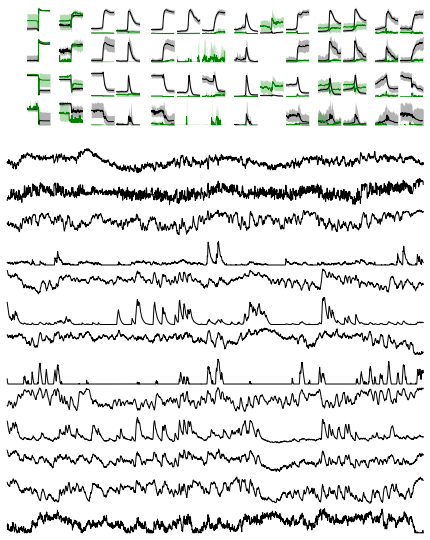

In [66]:
rng = (xi>3) & (xi<7)
layout = ff.FigureLayout('figure2_layout.svg')
layout.make_mplfigures()
def plot_gd(group_key):
    
    layout_group = layout.axes_groups[group_key]
    for skey in layout_group.keys():
        ax = layout_group[skey]['axis']
        # experimental data
        fill_kwargs = {'alpha':0.3,'clip_on':False,'lw':0,'color':'k'}
        ub = np.array(data_dict[group_key][skey]['ub'])
        lb = np.array(data_dict[group_key][skey]['lb'])
        m = np.array(data_dict[group_key][skey]['m'])
        ### transform into natural units
        ub = gd.signal_plot_info[skey]['transform'](ub)
        lb = gd.signal_plot_info[skey]['transform'](lb)
        m = gd.signal_plot_info[skey]['transform'](m)
        ax.fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
        ax.plot(xi[rng],m[rng],color = fill_kwargs['color'])
        
        # control data
        fill_kwargs = {'alpha':0.3,'clip_on':False,'lw':0,'color':'g'}
        ub = np.array(data_dict[group_key+'_c'][skey]['ub'])
        lb = np.array(data_dict[group_key+'_c'][skey]['lb'])
        m = np.array(data_dict[group_key+'_c'][skey]['m'])
        ### transform into natural units
        ub = gd.signal_plot_info[skey]['transform'](ub)
        lb = gd.signal_plot_info[skey]['transform'](lb)
        m = gd.signal_plot_info[skey]['transform'](m)
        ax.fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
        ax.plot(xi[rng],m[rng],color = fill_kwargs['color'])
        
        ff.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
        gca().set_ybound(lookup_ybound[skey])

[plot_gd(group_key) for group_key in layout.axes_groups.keys() if not('traces' in group_key)]
#######################
##
#######################

#fly = gd.swarms['GMR22H05'].flies[11]
#fly = gd.swarms['GMR22H05'].flies[8]
fly = gd.swarms['GMR22H05_pr'].flies[5]
#fly = gd.swarms['GMR22H05_pr'].flies[11]

fly.open_fly_record()
muscle_sigs = fly.get_pkl_data('nnls_fits_bk_sub_F.cpkl')
axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase']      
endidx = 22700
scale = 2500   
for skey in layout.axes_groups['traces'].keys():
    if skey in ['Ph1','wb_frequency']:
        signal = axon_sigs[skey]
    else:
        signal = muscle_sigs['fits'][muscle_sigs['muscles'].index(skey)]
    ax = layout.axes_groups['traces'][skey]['axis']
    ax.plot(signal[endidx-scale:endidx],color = 'k',clip_on = False)
    ff.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
layout.insert_figures('mpl_panel_a')
layout.write_svg('testfigurefirst.svg')

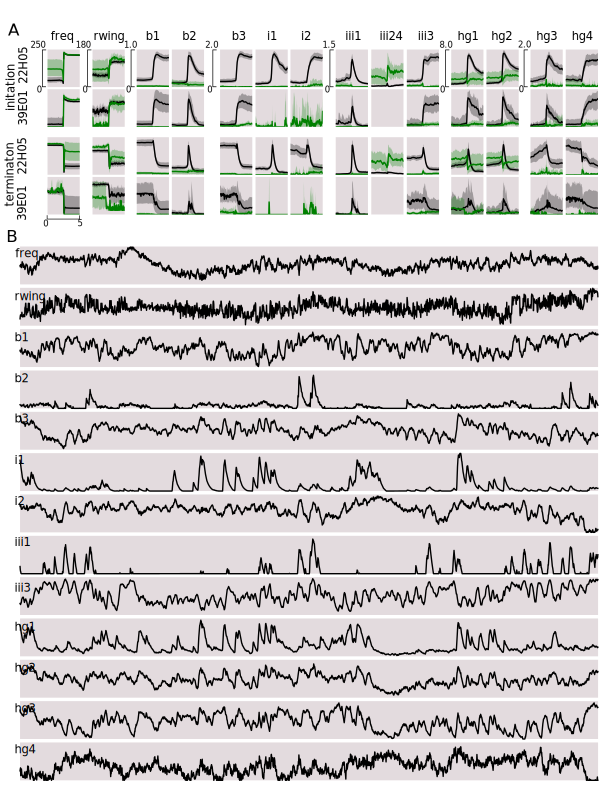

In [67]:
display(SVG(layout.output_xml.toxml()))

In [ ]:
import flylib as flb
hists = list()
#fly = gd.swarms['GMR22H05_pr'].flies[11]
for fly in gd.swarms['GMR22H05_pr'].flies:
    fly.open_fly_record()
    bins = np.arange(0,2*pi,2*pi/96.0)
    axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase'] 
    stripesig = np.array(axon_sigs['Xpos'])
    stripesig -= min(stripesig)
    stripesig /= max(stripesig)
    stripesig *= 2*pi
    idx = flb.idx_by_thresh(around(np.array(axon_sigs['StimCond']))<0,0.5)[0]
    idx = argwhere(np.array(axon_sigs['wb_frequency'])[idx]>150.0)
    h = histogram(stripesig[idx],bins = bins,normed = True)[0]
    h[0] = h[-1]
    h = hstack((h,h[0]))
    hists.append(h)

In [ ]:
subplot(1,1,1,polar = True)
plot(bins,hists[8])

In [ ]:
subplot(1,1,1,polar = True)
plot(bins,np.mean(hists,axis = 0))
ub = np.mean(hists,axis = 0)+np.std(hists,axis = 0)
lb = np.mean(hists,axis = 0)-np.std(hists,axis = 0)
fill_between(bins,ub,lb,lw = 0)
plot(bins,np.mean(hists,axis = 0))
savefig('spos_group.pdf')

In [ ]:
shape(hists)

In [ ]:
idx = find(np.array(muscle_sigs['muscles']) == 'b1')[0]
sig = np.array(muscle_sigs['fits'][idx])

In [ ]:
testsig = sig[0:1000]
plot(testsig)

In [ ]:
import pyfnnd

In [ ]:
n_best, c_best, LL, theta_best = pyfnnd.deconvolve(testsig,dt = 0.021,verbosity=1,learn_theta=(None, None, None, None, None),
    spikes_tol=1E-6, params_tol=1E-6,rate = 500,tau = 2.0)

In [ ]:
from scipy.signal import find_peaks_cwt
idxs = find_peaks_cwt(n_best,np.arange(1,2))

In [ ]:
subplot(2,1,1)
plot(testsig[:1000])
subplot(2,1,2)
plot(n_best[:1000])
plot(idxs[:100],n_best[idxs[:100]],'o')